# Dataset Cartography Notebook

In [3]:
%load_ext autoreload
%autoreload 2

## Train model

Using other training scripts, custom callback written, however, not working properly

TODO: custom training loop to be able to save logits at the time of computation to stop duplicit computing!

## Create specified JSONL files

Use */home/mlynatom/experimental-mlynatom/slurm/training/dynamics.batch* to use *dynamics.py*. This script computes Logits with saved checkpoints

## Check specified JSONL files with training dynamics

In [10]:
import json
import pandas as pd
import os
import sys
from datasets import load_from_disk

In [17]:
TASK="CsFEVERv2"
#PATH_TO_MODEL_OUTPUT_DIR_WITH_TRAINING_DYNAMICS="/home/mlynatom/models/xlm-roberta-large-squad2-csfever_v2-original_nli-batchsize-9-wr0.4/"
PATH_TO_MODEL_OUTPUT_DIR_WITH_TRAINING_DYNAMICS="/home/mlynatom/models/xlm-roberta-large-squad2-csfever_v2-original_nli-batchsize-9-wr0.4-steps3000"
MODEL_NAME="XLM-RoBERTa-large-squad2-csfever_v2"

In [6]:
dynamics_path = os.path.join(PATH_TO_MODEL_OUTPUT_DIR_WITH_TRAINING_DYNAMICS, "training_dynamics")

for file in os.listdir(dynamics_path):
    data = []
    with open(os.path.join(dynamics_path, file), "r") as f:
        for line in f:
            loaded_line = json.loads(line)
            loaded_line["guid"] = int(loaded_line["guid"])
            loaded_line["gold"] = int(loaded_line["gold"])

            data.append(loaded_line)

    with open(os.path.join(dynamics_path, file), "w") as f:
        f.writelines(json.dumps(data_point, ensure_ascii=False,
                     sort_keys=True) + "\n" for data_point in data)

In [7]:
dynamics_path = os.path.join(PATH_TO_MODEL_OUTPUT_DIR_WITH_TRAINING_DYNAMICS, "training_dynamics")

for file in os.listdir(dynamics_path):
    data = []
    file_path = os.path.join(dynamics_path, file)
    df = pd.read_json(file_path, lines=True)
    df.drop_duplicates(subset=["guid"], inplace=True)
    df.to_json(file_path, lines=True, orient="records")

In [8]:
df = pd.read_json("/home/mlynatom/models/xlm-roberta-large-squad2-csfever_v2-original_nli-batchsize-9-wr0.4-steps3000/training_dynamics/dynamics_epoch_0.jsonl", lines=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112336 entries, 0 to 112335
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   gold            112336 non-null  int64 
 1   guid            112336 non-null  int64 
 2   logits_epoch_0  112336 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.6+ MB


In [10]:
df

,gold,guid,logits_epoch_0
0,1,55231,"[-2.0275299549, 2.8132224083, -1.2597740889]"
1,2,225400,"[-2.5775053501, -3.055863142, 5.0495257378]"
2,0,184972,"[2.1264591217, -1.0316311121, -1.0008229017]"
3,0,208571,"[3.6420156956, -1.4013012648, -2.6055541039]"
4,2,100075,"[-1.8217715025, -1.1925668716, 2.657173872]"
...,...,...,...
112331,1,219488,"[-1.8252332211, 2.9110884666, -1.5165075064]"
112332,0,6665,"[2.7626681328, -0.8833220601, -2.077239275]"
112333,2,43743,"[-2.567479372, -3.3254992962, 5.3582072258]"
112334,0,66913,"[3.57487607, -1.6028133631, -2.326726675]"


In [14]:
os.getcwd()

'/home/mlynatom/cartography'

In [13]:
os.chdir("cartography")

In [15]:
sys.path.append(os.getcwd())

2023-08-25 09:31:11,177 - INFO - cartography.selection.selection_utils - Reading 23 files from /home/mlynatom/models/xlm-roberta-large-squad2-csfever_v2-original_nli-batchsize-9-wr0.4-steps3000/training_dynamics ...
 91%|█████████▏| 21/23 [00:09<00:01,  1.99it/s]

100%|██████████| 23/23 [00:10<00:00,  2.21it/s]
2023-08-25 09:31:21,582 - INFO - cartography.selection.selection_utils - Read training dynamics for 112336 train instances.
2023-08-25 09:31:21,586 - INFO - __main__ - Total epochs found: 23
2023-08-25 09:31:21,588 - INFO - __main__ - Computing training dynamics across 23 epochs
2023-08-25 09:31:21,588 - INFO - __main__ - Metrics computed: confidence, variability, correctness, forgetfulness, threshold_closeness
100%|██████████| 112336/112336 [00:37<00:00, 3009.63it/s]
2023-08-25 09:31:59,600 - INFO - __main__ - Metrics based on Training Dynamics written to /home/mlynatom/models/xlm-roberta-large-squad2-csfever_v2-original_nli-batchsize-9-wr0.4-steps3000/td_metrics.jsonl
2023-08-25 09:31:59,602 - INFO - __main__ - Plotting figure for CsFEVERv2 using the XLM-RoBERTa-large-squad2-csfever_v2 model ...
2023-08-25 09:31:59,897 - WARNING - matplotlib.font_manager - findfont: Font family ['Georgia'] not found. Falling back to DejaVu Sans.
2023-08

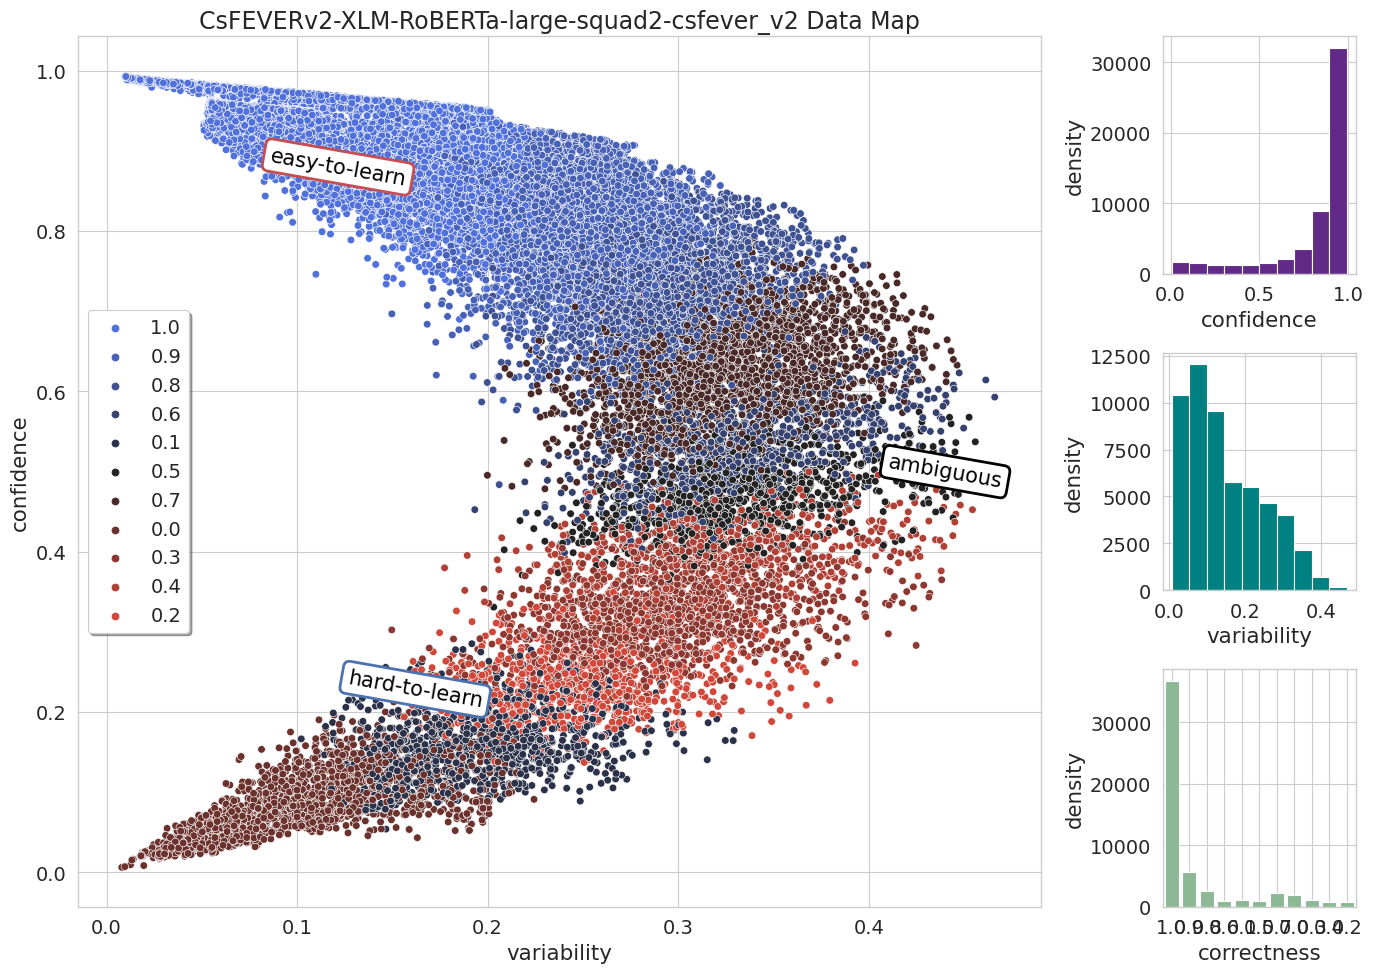

In [18]:
%run /home/mlynatom/cartography/cartography/selection/train_dy_filtering.py \
    --plot \
    --task_name $TASK \
    --model_dir $PATH_TO_MODEL_OUTPUT_DIR_WITH_TRAINING_DYNAMICS \
    --model $MODEL_NAME

2023-08-18 09:03:52,069 - INFO - cartography.selection.selection_utils - Reading 5 files from /home/mlynatom/models/xlm-roberta-large-squad2-csfever_v2-original_nli-batchsize-9-wr0.4/training_dynamics ...
  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:03<00:00,  1.64it/s]
2023-08-18 09:03:55,129 - INFO - cartography.selection.selection_utils - Read training dynamics for 112336 train instances.
2023-08-18 09:03:55,138 - INFO - __main__ - Computing training dynamics across 5 epochs
2023-08-18 09:03:55,138 - INFO - __main__ - Metrics computed: confidence, variability, correctness, forgetfulness, threshold_closeness
100%|██████████| 112336/112336 [00:15<00:00, 7310.30it/s]
2023-08-18 09:04:11,399 - INFO - __main__ - Metrics based on Training Dynamics written to /home/mlynatom/models/xlm-roberta-large-squad2-csfever_v2-original_nli-batchsize-9-wr0.4/td_metrics.jsonl
2023-08-18 09:04:11,401 - INFO - __main__ - Plotting figure for CsFEVER_v2 using the XLM-RoBERTa-large-squad2-csfever_v2 model ...
2023-08-18 09:04:11,856 - WARNING - matplotlib.font_manager - findfont: Font family ['Georgia'] not found. Falling back to DejaVu Sans.
2023-08-18 09:04:11,894 - WARNING - matplotlib.font_manager - findfont: Font family ['

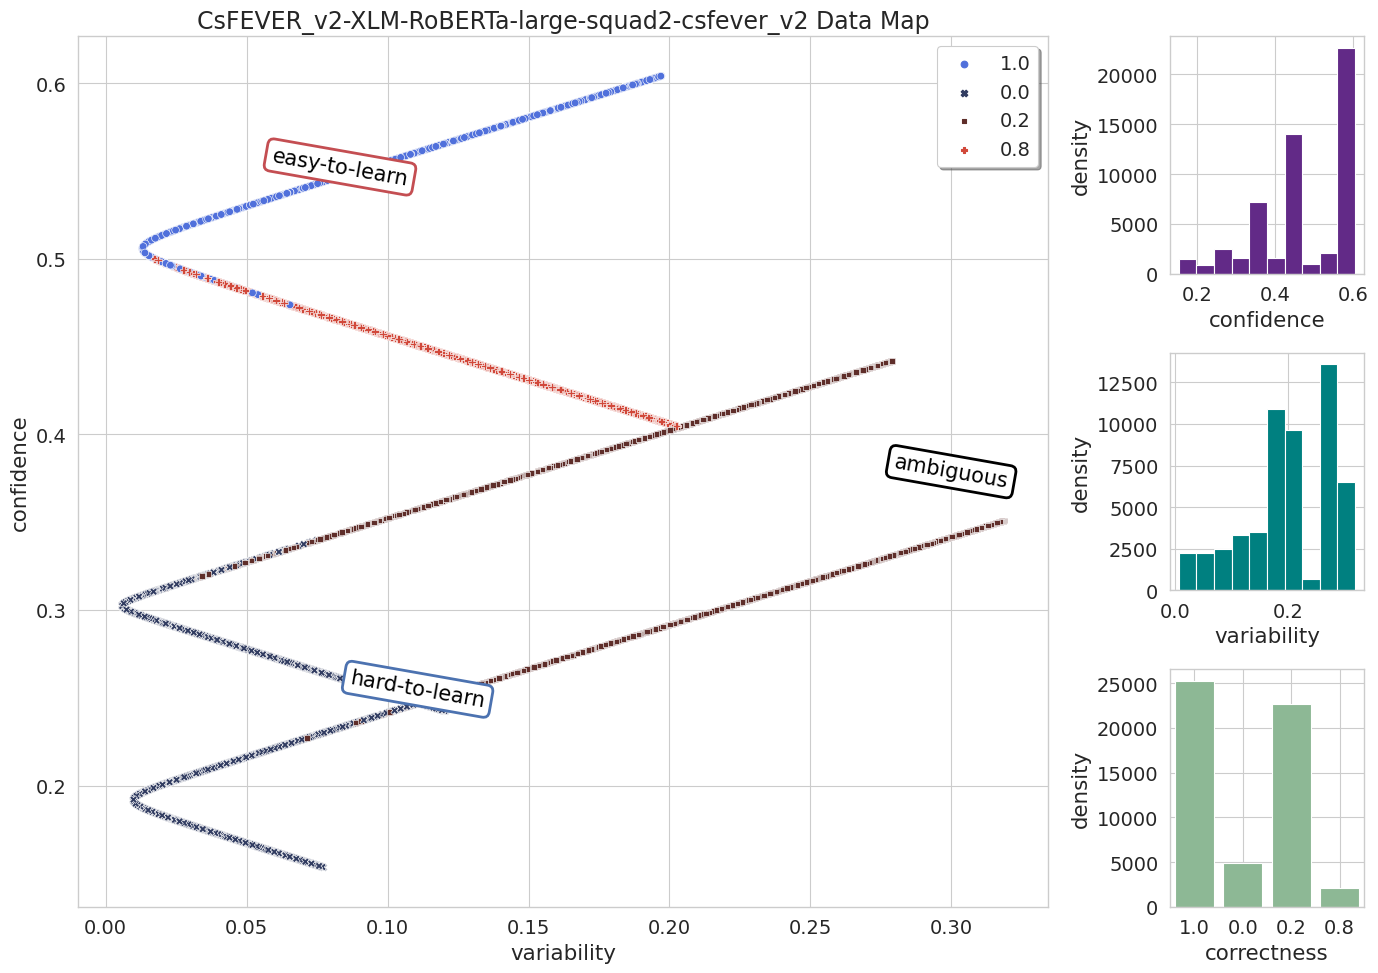

In [8]:
%run /home/mlynatom/cartography/cartography/selection/train_dy_filtering.py \
    --plot \
    --task_name $TASK \
    --model_dir $PATH_TO_MODEL_OUTPUT_DIR_WITH_TRAINING_DYNAMICS \
    --model $MODEL_NAME \
    --burn_out 5

2023-08-18 09:10:19,605 - INFO - cartography.selection.selection_utils - Reading 10 files from /home/mlynatom/models/xlm-roberta-large-squad2-csfever_v2-original_nli-batchsize-9-wr0.4/training_dynamics ...
  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:05<00:00,  1.91it/s]
2023-08-18 09:10:24,839 - INFO - cartography.selection.selection_utils - Read training dynamics for 112336 train instances.
2023-08-18 09:10:24,849 - INFO - __main__ - Computing training dynamics across 10 epochs
2023-08-18 09:10:24,849 - INFO - __main__ - Metrics computed: confidence, variability, correctness, forgetfulness, threshold_closeness
100%|██████████| 112336/112336 [00:25<00:00, 4473.07it/s]
2023-08-18 09:10:50,665 - INFO - __main__ - Metrics based on Training Dynamics written to /home/mlynatom/models/xlm-roberta-large-squad2-csfever_v2-original_nli-batchsize-9-wr0.4/td_metrics.jsonl
2023-08-18 09:10:50,667 - INFO - __main__ - Plotting figure for CsFEVER_v2 using the XLM-RoBERTa-large-squad2-csfever_v2 model ...
2023-08-18 09:10:59,003 - INFO - __main__ - Plot saved to /home/mlynatom/cartography/cartography/CsFEVER_v2_XLM-RoBERTa-large-squad2-csfever_v2.pdf


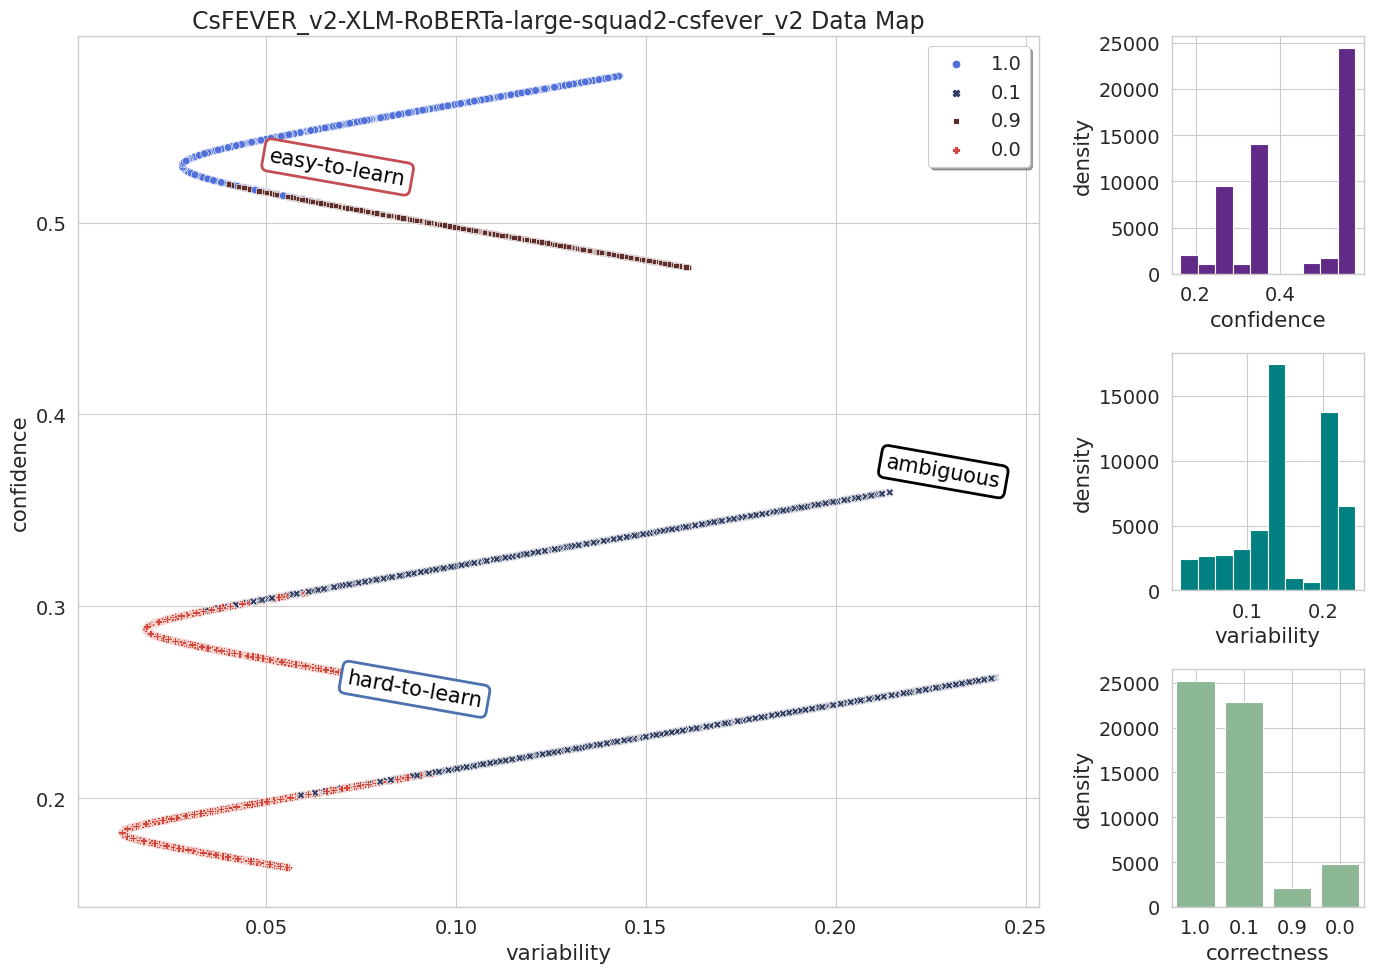

In [10]:
%run /home/mlynatom/cartography/cartography/selection/train_dy_filtering.py \
    --plot \
    --task_name $TASK \
    --model_dir $PATH_TO_MODEL_OUTPUT_DIR_WITH_TRAINING_DYNAMICS \
    --model $MODEL_NAME \
    --burn_out 10

## Own visualizations

In [1]:
import pandas as pd
import plotly.express as px
from typing import Optional, List
import numpy as np

In [2]:
METRICS = "/home/mlynatom/models/xlm-roberta-large-squad2-csfever_v2-original_nli-batchsize-9-wr0.4-steps3000/td_metrics.jsonl"
#METRICS = "/home/mlynatom/models/xlm-roberta-large-squad2-csfever_v2-original_nli-batchsize-9-wr0.4/td_metrics_burn_out5.jsonl"
#METRICS = "/home/mlynatom/models/xlm-roberta-large-squad2-csfever_v2-original_nli-batchsize-9-wr0.4/td_metrics_all.jsonl"

In [3]:
df = pd.read_json(METRICS, lines=True)

In [4]:
def plot_scatter_px(df, x,y, to_colours=None, colours=None, hover_name:str="id", hover_data:List[str]=["sentence1", "label", "predicted_label"], symbol: Optional[str]=None):
    colors = {True:'green', False:'red'}

    if to_colours is not None:
        fig = px.scatter(data_frame=df, x=x, y=y, color=map(lambda x: colors[x],to_colours), hover_data=hover_data, hover_name=hover_name, symbol=symbol)
    elif colours is not None:
        fig = px.scatter(data_frame=df, x=x, y=y, color=colours, hover_data=hover_data, hover_name=hover_name, symbol=symbol)
    else:
        fig = px.scatter(data_frame=df, x=x, y=y, hover_data=hover_data, hover_name=hover_name, symbol=symbol)
    
    return fig

In [5]:
df

,guid,index,threshold_closeness,confidence,variability,correctness,forgetfulness
0,55231,0,0.074441,0.918997,0.108088,22,1
1,225400,1,0.007879,0.992058,0.010412,23,0
2,184972,2,0.138740,0.833556,0.241504,21,2
3,208571,3,0.037326,0.961166,0.055014,23,0
4,100075,4,0.231526,0.635921,0.312571,17,4
...,...,...,...,...,...,...,...
112331,219488,112331,0.097746,0.890197,0.193095,21,2
112332,6665,112332,0.110984,0.872848,0.153487,22,1
112333,43743,112333,0.006914,0.993038,0.009830,23,0
112334,66913,112334,0.040568,0.957637,0.060012,23,0


In [ ]:
plot_scatter_px(df, x="variability", y="confidence", hover_name="guid", hover_data=None)

### Deleted Compare

filtering1

In [25]:
f1_filtered_train = pd.read_json("/home/mlynatom/data/cs_fever/F1_titles_anserininew_threshold/train_fb_cs_nli_split_F1_titles_anserininew.jsonl", lines=True)

In [26]:
f1_filtered_train.rename({"id":"guid"}, axis=1, inplace=True)

In [27]:
f1_filtered_train

,claim,claim_en,evidence,evidence_cs,guid,label,label_predicted,predicted_score,verifiable
0,Jeff Bridges byl v práci.,Jeff Bridges was in a work.,"[[Jeff Bridges, Jeff Bridges]]",{'Jeff Bridges': 'Jeffrey Leon „Jeff“ Bridges ...,123805,SUPPORTS,SUPPORTS,0.965232,VERIFIABLE
1,Kobe Bryant byl kritický k NBA.,Kobe Bryant was critical of the NBA.,"[[Kobe Bryant, ]]",{'Kobe Bryant': 'Kobe Bean Bryant (23. srpna 1...,49690,NOT ENOUGH INFO,NOT ENOUGH INFO,-1.000000,NOT VERIFIABLE
2,Michelle Williamsová hrála v amerických filmech.,Michelle Williams has been in American films.,"[[Michelle Williamsová (herečka), Michelle Wil...",{'Michelle Williamsová (herečka)': 'Michelle I...,19315,SUPPORTS,SUPPORTS,0.954145,VERIFIABLE
3,"Frank je člověk, který zpívá.",Frank is made by a person who sings.,"[[Frank (album), Frank (Amy Winehouse album)],...","{'Amy Winehouse': 'Amy Jade Winehouse, přechýl...",43002,SUPPORTS,SUPPORTS,0.962937,VERIFIABLE
4,H. H. Holmes se narodil 16. května 1861 ve srubu.,"H. H. Holmes was born on May 16th, 1861 in a l...","[[H. H. Holmes, ]]",{'H. H. Holmes': 'Herman Webster Mudgett (16. ...,170331,NOT ENOUGH INFO,NOT ENOUGH INFO,-1.000000,NOT VERIFIABLE
...,...,...,...,...,...,...,...,...,...
83433,Whoopi Goldbergová je spisovatelka.,Whoopi Goldberg is an author.,"[[Whoopi Goldbergová, Whoopi Goldberg]]","{'Whoopi Goldbergová': 'Whoopi Goldbergová, pů...",35449,SUPPORTS,SUPPORTS,0.958671,VERIFIABLE
83434,Anna Hathaway hrála v Mulan.,Anna Hathaway acted in Mulan.,"[[Liou I-fej, ]]","{'Liou I-fej': 'Liou I-fej (, anglickou transk...",55445,NOT ENOUGH INFO,NOT ENOUGH INFO,-1.000000,NOT VERIFIABLE
83435,Joaquin Phoenix podporuje filantropické organi...,Joaquin Phoenix supports philanthropic organiz...,"[[Joaquin Phoenix, Joaquin Phoenix]]",{'Joaquin Phoenix': 'Joaquin Raphael Phoenix (...,75327,SUPPORTS,SUPPORTS,0.897570,VERIFIABLE
83436,"Cosmopolitan od roku 2011 obsahuje obsah, kter...",Cosmopolitan as of 2011 contains content which...,"[[Cosmopolitan, Cosmopolitan (magazine)]]",{'Cosmopolitan': 'Cosmopolitan (; zkráceně Cos...,205932,SUPPORTS,SUPPORTS,0.927814,VERIFIABLE


In [28]:
merged_data = pd.merge(df, f1_filtered_train[["guid", "label", "label_predicted"]], on="guid", how="left", indicator=True)

In [29]:
np.unique(merged_data._merge.to_numpy())

array(['both', 'left_only'], dtype=object)

In [30]:
merged_data

,guid,index,threshold_closeness,confidence,variability,correctness,forgetfulness,label,label_predicted,_merge
0,55231,0,0.074441,0.918997,0.108088,22,1,REFUTES,REFUTES,both
1,225400,1,0.007879,0.992058,0.010412,23,0,NOT ENOUGH INFO,NOT ENOUGH INFO,both
2,184972,2,0.138740,0.833556,0.241504,21,2,NaN,NaN,left_only
3,208571,3,0.037326,0.961166,0.055014,23,0,SUPPORTS,SUPPORTS,both
4,100075,4,0.231526,0.635921,0.312571,17,4,NOT ENOUGH INFO,NOT ENOUGH INFO,both
...,...,...,...,...,...,...,...,...,...,...
118112,219488,112331,0.097746,0.890197,0.193095,21,2,REFUTES,REFUTES,both
118113,6665,112332,0.110984,0.872848,0.153487,22,1,SUPPORTS,SUPPORTS,both
118114,43743,112333,0.006914,0.993038,0.009830,23,0,NOT ENOUGH INFO,NOT ENOUGH INFO,both
118115,66913,112334,0.040568,0.957637,0.060012,23,0,SUPPORTS,SUPPORTS,both


In [31]:
merged_data["is_filtered"] = merged_data.apply(lambda x: x._merge == 'left_only', axis=1)

In [ ]:
plot_scatter_px(merged_data, x="variability", y="confidence", hover_name="guid", hover_data=["confidence", "variability", "is_filtered", "label", "label_predicted"], colours="is_filtered")

filtering2

In [11]:
dataset2 = load_from_disk("/home/mlynatom/data/cs_fever/F1_filtered2")

In [12]:
df2 = dataset2["train"].to_pandas()

In [14]:
df2.rename({"id":"guid"}, axis=1, inplace=True)

In [15]:
df2

,guid,label,claim,evidence
0,75397,0,Nikolaj Coster-Waldau pracoval pro Fox Broadca...,Nikolaj Coster-Waldau. Nikolaj Coster-Waldau (...
1,214861,0,"Dějiny umění zahrnují architekturu, tanec, soc...",Dějiny umění. Dějiny umění je pojem zpravidla ...
2,33078,0,Boston Celtics hrají své domácí zápasy v TD Ga...,Boston Celtics. Boston Celtics je basketbalový...
3,6744,0,Desatero přikázání je epický film.,"Desatero přikázání (film, 1956). Desatero přik..."
4,226034,0,Tetris prodal miliony fyzických kopií.,Tetris. Tetris () je počítačová hra rozšířená ...
...,...,...,...,...
111778,44207,2,"V Austrálii byla trestanecká kolonie, která je...",Brisbane. Brisbane je třetí největší město v A...
111779,22373,2,Paul Newman byl Němec.,Paul Newman. Paul Leonard Newman (26. ledna 19...
111780,165362,2,Světový festival vědy je organizace.,Týden vědy a techniky Akademie věd České repub...
111781,175970,2,Comeback se stále vysílá.,BBC Alba. BBC Alba je televizní kanál veřejnop...


In [18]:
merged_data2 = pd.merge(df, df2[["guid", "label"]], on="guid", how="left", indicator=True)
merged_data2["is_filtered"] = merged_data2.apply(lambda x: x._merge == 'left_only', axis=1)

In [ ]:
plot_scatter_px(merged_data2, x="variability", y="confidence", hover_name="guid", hover_data=["confidence", "variability", "is_filtered", "label"], colours="is_filtered")

filtering3

In [21]:
dataset3 = load_from_disk("/home/mlynatom/data/cs_fever/F1_filtered3")

In [22]:
df3 = dataset3["train"].to_pandas()
df3.rename({"id":"guid"}, axis=1, inplace=True)

In [23]:
df3

,guid,label,claim,evidence
0,75397,0,Nikolaj Coster-Waldau pracoval pro Fox Broadca...,Nikolaj Coster-Waldau. Nikolaj Coster-Waldau (...
1,214861,0,"Dějiny umění zahrnují architekturu, tanec, soc...",Dějiny umění. Dějiny umění je pojem zpravidla ...
2,33078,0,Boston Celtics hrají své domácí zápasy v TD Ga...,Boston Celtics. Boston Celtics je basketbalový...
3,6744,0,Desatero přikázání je epický film.,"Desatero přikázání (film, 1956). Desatero přik..."
4,226034,0,Tetris prodal miliony fyzických kopií.,Tetris. Tetris () je počítačová hra rozšířená ...
...,...,...,...,...
111339,44207,2,"V Austrálii byla trestanecká kolonie, která je...",Brisbane. Brisbane je třetí největší město v A...
111340,22373,2,Paul Newman byl Němec.,Paul Newman. Paul Leonard Newman (26. ledna 19...
111341,165362,2,Světový festival vědy je organizace.,Týden vědy a techniky Akademie věd České repub...
111342,175970,2,Comeback se stále vysílá.,BBC Alba. BBC Alba je televizní kanál veřejnop...


In [24]:
merged_data3 = pd.merge(df, df3[["guid", "label"]], on="guid", how="left", indicator=True)
merged_data3["is_filtered"] = merged_data3.apply(lambda x: x._merge == 'left_only', axis=1)

In [ ]:
plot_scatter_px(merged_data3, x="variability", y="confidence", hover_name="guid", hover_data=["confidence", "variability", "is_filtered", "label"], colours="is_filtered")

## Annotated Data Comparison

In [33]:
annotated_data = pd.read_csv("/home/mlynatom/data/annotated_fcheck/fever_pair_1%_annotated.csv", delimiter=";")

In [34]:
annotated_data.rename({"fever_id":"guid"}, axis=1, inplace=True)

In [35]:
#show info about loaded dataset
annotated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1283 entries, 0 to 1282
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1283 non-null   int64  
 1   guid         1283 non-null   int64  
 2   claim        1283 non-null   object 
 3   claim_cs     1283 non-null   object 
 4   evidence     1283 non-null   object 
 5   evidence_cs  1283 non-null   object 
 6   label        1283 non-null   object 
 7   label_cs     1283 non-null   object 
 8   checked_by   1283 non-null   int64  
 9   created_at   0 non-null      float64
 10  updated_at   1283 non-null   int64  
 11  random       0 non-null      float64
dtypes: float64(2), int64(4), object(6)
memory usage: 120.4+ KB


In [36]:
#print head of the dataframe
annotated_data.head()

,id,guid,claim,claim_cs,evidence,evidence_cs,label,label_cs,checked_by,created_at,updated_at,random
0,1,20036,Paul McCartney is a two-time inductee into the...,Paul McCartney byl dvakrát uveden do Rock'n'ro...,"[[""Paul McCartney"", 9]]","{""Paul McCartney"": ""Sir James Paul McCartney C...",SUPPORTS,MISTRANSLATED,350,NaN,1676294555,NaN
1,2,17792,Warren Buffett is a philanthropist.,Warren Buffett je filantrop.,"[[""Warren Buffett"", 0]]","{""Warren Buffett"": ""Warren Edward Buffett, \n\...",SUPPORTS,SUPPORTS,350,NaN,1676549803,NaN
2,3,72323,Woody Allen has won four Oscars.,Woody Allen získal čtyři Oscary.,"[[""Woody Allen"", 17], [""Oscar"", 0]]","{""Oscar"": ""Oscar, jinak také Cena Akademie (an...",SUPPORTS,SUPPORTS,350,NaN,1676293747,NaN
3,4,41890,Cells are fundamental units of structure and f...,Buňky jsou základní jednotky struktury a funkce.,"[[""Buňka"", 12]]","{""Buňka"": ""Buňka (lat. \""cellula\"") je základn...",SUPPORTS,SUPPORTS,350,NaN,1676550363,NaN
4,5,58083,Batman is exceptionally unintelligent.,Batman je výjimečně neinteligentní.,"[[""Batman"", 11]]","{""Batman"": ""Batman je komiksová postava, stvoř...",REFUTES,REFUTES,350,NaN,1676468199,NaN


In [37]:
merged_annotated_data = pd.merge(df, annotated_data[["guid", "label_cs", "label", "claim_cs"]], on="guid", how="inner")

In [38]:
merged_annotated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   guid                 1209 non-null   int64  
 1   index                1209 non-null   int64  
 2   threshold_closeness  1209 non-null   float64
 3   confidence           1209 non-null   float64
 4   variability          1209 non-null   float64
 5   correctness          1209 non-null   int64  
 6   forgetfulness        1209 non-null   int64  
 7   label_cs             1209 non-null   object 
 8   label                1209 non-null   object 
 9   claim_cs             1209 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 103.9+ KB


### Plot MISTRANSLATED

In [39]:
merged_annotated_data["is_mistranslated"] = merged_annotated_data.apply(lambda x: x.label_cs == "MISTRANSLATED", axis=1)

In [ ]:
plot_scatter_px(merged_annotated_data, x="variability", y="confidence", hover_name="guid", hover_data=["confidence", "variability", "is_mistranslated", "label", "label_cs"], colours="is_mistranslated")

### Change MISTRANSLATED to NEI

In [41]:
merged_annotated_data.replace({"label_cs": {"MISTRANSLATED": "NOT ENOUGH INFO"}}, inplace=True)

### Show Annotated

In [42]:
merged_annotated_data["is_correct_label"] = merged_annotated_data.apply(lambda x: x.label_cs == x.label, axis=1)

In [ ]:
plot_scatter_px(merged_annotated_data, x="variability", y="confidence", hover_name="guid", hover_data=["confidence", "variability", "is_mistranslated", "label", "label_cs"], colours="is_correct_label")

## Select data

In [1]:
from datasets import load_dataset

In [2]:
dataset = load_dataset("ctu-aic/csfever_v2", "original_nli")

Found cached dataset csfever_v2 (/home/mlynatom/.cache/huggingface/datasets/ctu-aic___csfever_v2/original_nli/1.1.0/65d04138ecb653eab2159e390f6dd47529c74e27c36312ab922921e7cabc1e1c)


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'label', 'claim', 'evidence'],
        num_rows: 118950
    })
    validation: Dataset({
        features: ['id', 'label', 'claim', 'evidence'],
        num_rows: 7458
    })
    test: Dataset({
        features: ['id', 'label', 'claim', 'evidence'],
        num_rows: 7520
    })
})

In [4]:
dataset.rename_column("id", "guid")

DatasetDict({
    train: Dataset({
        features: ['guid', 'label', 'claim', 'evidence'],
        num_rows: 118950
    })
    validation: Dataset({
        features: ['guid', 'label', 'claim', 'evidence'],
        num_rows: 7458
    })
    test: Dataset({
        features: ['guid', 'label', 'claim', 'evidence'],
        num_rows: 7520
    })
})

In [6]:
dataset["train"].to_csv("/home/mlynatom/data/cs_fever/csfever_v2-original_nli-tsv/train.tsv", sep="\t")

Creating CSV from Arrow format:   0%|          | 0/119 [00:00<?, ?ba/s]

1193757609

In [8]:
dataset["validation"].to_csv("/home/mlynatom/data/cs_fever/csfever_v2-original_nli-tsv/dev.tsv", sep="\t")

Creating CSV from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

42401318

In [9]:
dataset["test"].to_csv("/home/mlynatom/data/cs_fever/csfever_v2-original_nli-tsv/test.tsv", sep="\t")

Creating CSV from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

53614355

In [6]:
TASK="CsFEVERv2"
PATH_TO_MODEL_OUTPUT_DIR_WITH_TRAINING_DYNAMICS="/home/mlynatom/models/xlm-roberta-large-squad2-csfever_v2-original_nli-batchsize-9-wr0.4/"
MODEL_NAME="XLM-RoBERTa-large-squad2-csfever_v2"
PATH_TO_GLUE_DIR_WITH_ORIGINAL_DATA_IN_TSV_FORMAT="/home/mlynatom/data/cs_fever/csfever_v2-original_nli-tsv"


### Hard-to-learn

In [7]:
METRIC = "confidence"

In [8]:
%run /home/mlynatom/cartography/cartography/selection/train_dy_filtering.py \
    --filter \
    --task_name $TASK \
    --model_dir $PATH_TO_MODEL_OUTPUT_DIR_WITH_TRAINING_DYNAMICS \
    --metric $METRIC \
    --data_dir $PATH_TO_GLUE_DIR_WITH_ORIGINAL_DATA_IN_TSV_FORMAT \
    --burn_out 5 \
    --filtering_output_dir /home/mlynatom/data/cartography/filtered/hard-to-learn

2023-08-23 13:22:57,951 - INFO - cartography.selection.selection_utils - Reading 5 files from /home/mlynatom/models/xlm-roberta-large-squad2-csfever_v2-original_nli-batchsize-9-wr0.4/training_dynamics ...
100%|██████████| 5/5 [00:02<00:00,  1.92it/s]
2023-08-23 13:23:00,566 - INFO - cartography.selection.selection_utils - Read training dynamics for 112336 train instances.
2023-08-23 13:23:00,578 - INFO - __main__ - Computing training dynamics across 5 epochs
2023-08-23 13:23:00,578 - INFO - __main__ - Metrics computed: confidence, variability, correctness, forgetfulness, threshold_closeness
100%|██████████| 112336/112336 [00:14<00:00, 7709.24it/s]
2023-08-23 13:23:15,791 - INFO - __main__ - Metrics based on Training Dynamics written to /home/mlynatom/models/xlm-roberta-large-squad2-csfever_v2-original_nli-batchsize-9-wr0.4/td_metrics.jsonl
2023-08-23 13:23:15,809 - WARNING - cartography.data_utils - Data reading only works when data is in TSV format,  and last column as classification 

### Ambiguous

In [16]:
METRIC="variability"

In [17]:
%run /home/mlynatom/cartography/cartography/selection/train_dy_filtering.py \
    --filter \
    --task_name $TASK \
    --model_dir $PATH_TO_MODEL_OUTPUT_DIR_WITH_TRAINING_DYNAMICS \
    --metric $METRIC \
    --data_dir $PATH_TO_GLUE_DIR_WITH_ORIGINAL_DATA_IN_TSV_FORMAT \
    --burn_out 5

2023-08-23 11:24:55,130 - INFO - cartography.selection.selection_utils - Reading 5 files from /home/mlynatom/models/xlm-roberta-large-squad2-csfever_v2-original_nli-batchsize-9-wr0.4/training_dynamics ...
100%|██████████| 5/5 [00:04<00:00,  1.13it/s]
2023-08-23 11:24:59,549 - INFO - cartography.selection.selection_utils - Read training dynamics for 112336 train instances.
2023-08-23 11:24:59,559 - INFO - __main__ - Computing training dynamics across 5 epochs
2023-08-23 11:24:59,560 - INFO - __main__ - Metrics computed: confidence, variability, correctness, forgetfulness, threshold_closeness
100%|██████████| 112336/112336 [00:22<00:00, 5069.18it/s]
2023-08-23 11:25:22,441 - INFO - __main__ - Metrics based on Training Dynamics written to /home/mlynatom/models/xlm-roberta-large-squad2-csfever_v2-original_nli-batchsize-9-wr0.4/td_metrics.jsonl
2023-08-23 11:25:22,462 - WARNING - cartography.data_utils - Data reading only works when data is in TSV format,  and last column as classification 

### Easy-to-learn

In [20]:
METRIC = "confidence"

In [23]:
%run /home/mlynatom/cartography/cartography/selection/train_dy_filtering.py \
    --filter \
    --task_name $TASK \
    --model_dir $PATH_TO_MODEL_OUTPUT_DIR_WITH_TRAINING_DYNAMICS \
    --metric $METRIC \
    --data_dir $PATH_TO_GLUE_DIR_WITH_ORIGINAL_DATA_IN_TSV_FORMAT \
    --burn_out 5 \
    --worst \
    --filtering_output_dir /home/mlynatom/cartography/filtered/easy-to-learn/

2023-08-23 11:54:47,495 - INFO - cartography.selection.selection_utils - Reading 5 files from /home/mlynatom/models/xlm-roberta-large-squad2-csfever_v2-original_nli-batchsize-9-wr0.4/training_dynamics ...
100%|██████████| 5/5 [00:04<00:00,  1.10it/s]
2023-08-23 11:54:52,059 - INFO - cartography.selection.selection_utils - Read training dynamics for 112336 train instances.
2023-08-23 11:54:52,069 - INFO - __main__ - Computing training dynamics across 5 epochs
2023-08-23 11:54:52,070 - INFO - __main__ - Metrics computed: confidence, variability, correctness, forgetfulness, threshold_closeness
 28%|██▊       | 31603/112336 [00:06<00:15, 5137.87it/s]

100%|██████████| 112336/112336 [00:22<00:00, 4987.76it/s]
2023-08-23 11:55:15,329 - INFO - __main__ - Metrics based on Training Dynamics written to /home/mlynatom/models/xlm-roberta-large-squad2-csfever_v2-original_nli-batchsize-9-wr0.4/td_metrics.jsonl
2023-08-23 11:55:15,351 - WARNING - cartography.data_utils - Data reading only works when data is in TSV format,  and last column as classification label.
  0%|          | 0/118951 [00:00<?, ?it/s]2023-08-23 11:55:20,200 - INFO - cartography.data_utils_glue - Found clash in IDs ... skipping example 27726.
2023-08-23 11:55:20,208 - INFO - cartography.data_utils_glue - Found clash in IDs ... skipping example 147501.
2023-08-23 11:55:20,212 - INFO - cartography.data_utils_glue - Found clash in IDs ... skipping example 104782.
2023-08-23 11:55:20,213 - INFO - cartography.data_utils_glue - Found clash in IDs ... skipping example 155528.
2023-08-23 11:55:20,222 - INFO - cartography.data_utils_glue - Found clash in IDs ... skipping example 462

## Prepare Dataset

In [32]:
from datasets import load_dataset, Dataset

In [7]:
filtered_df = df[df.confidence > 0.2]

In [20]:
filtered_df = filtered_df.rename(columns={"guid": "id"})

In [21]:
filtered_df

,id,index,threshold_closeness,confidence,variability,correctness,forgetfulness
0,55231,0,0.074441,0.918997,0.108088,22,1
1,225400,1,0.007879,0.992058,0.010412,23,0
2,184972,2,0.138740,0.833556,0.241504,21,2
3,208571,3,0.037326,0.961166,0.055014,23,0
4,100075,4,0.231526,0.635921,0.312571,17,4
...,...,...,...,...,...,...,...
112330,122186,112330,0.074019,0.919501,0.238638,21,2
112331,219488,112331,0.097746,0.890197,0.193095,21,2
112332,6665,112332,0.110984,0.872848,0.153487,22,1
112333,43743,112333,0.006914,0.993038,0.009830,23,0


In [ ]:
plot_scatter_px(filtered_df, x="variability", y="confidence", hover_name="guid", hover_data=None)

In [12]:
original_dataset = load_dataset("ctu-aic/csfever_v2", "original_nli")

Found cached dataset csfever_v2 (/home/mlynatom/.cache/huggingface/datasets/ctu-aic___csfever_v2/original_nli/1.1.0/65d04138ecb653eab2159e390f6dd47529c74e27c36312ab922921e7cabc1e1c)


  0%|          | 0/3 [00:00<?, ?it/s]

In [13]:
original_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'label', 'claim', 'evidence'],
        num_rows: 118950
    })
    validation: Dataset({
        features: ['id', 'label', 'claim', 'evidence'],
        num_rows: 7458
    })
    test: Dataset({
        features: ['id', 'label', 'claim', 'evidence'],
        num_rows: 7520
    })
})

In [14]:
train_split = original_dataset["train"]

In [15]:
train_split

Dataset({
    features: ['id', 'label', 'claim', 'evidence'],
    num_rows: 118950
})

In [16]:
train_df = train_split.to_pandas()

In [17]:
train_df

,id,label,claim,evidence
0,55231,1,Mohamed není pro islám důležitý.,Mohamed. Mohamed (; 25. dubna 571 Mekka – 8. č...
1,225400,2,Absolute Beginners byla indie kapela založená ...,Mod (subkultura). Mod (původně modernist) je s...
2,184972,0,Yamaha Corporation působí především v Japonsku.,"Yamaha. Obchodní společnost Yamaha (ヤマハ株式会社 ""Y..."
3,208571,0,"Existuje země, která se jmenuje Indonésie.","Indonésie. Indonésie, plným názvem Indonéská r..."
4,100075,2,Seth Rogen získal vedlejší roli v The Office.,"Seth Rogen. Seth Rogen (* 15. dubna 1982, Vanc..."
...,...,...,...,...
118945,6665,0,Hawaii Five-0 je restart.,"Hawaii 5-0. Hawaii 5-0 (též Havaj 5-0, v angli..."
118946,43743,2,Muhammad je pro tenis důležitý.,"Gulbuddín Hekmatjár. Gulbuddín Hekmatjár, (* 1..."
118947,66913,0,Xbox One byl vyroben společností Microsoft.,"Xbox One. Xbox One je videoherní konzole, kter..."
118948,66780,0,Existuje fotbalista jménem Cristiano Ronaldo.,Cristiano Ronaldo. Cristiano Ronaldo dos Santo...


In [30]:
merged_df = pd.merge(train_df, filtered_df[["id"]], on="id", how="inner")

In [31]:
merged_df

,id,label,claim,evidence
0,55231,1,Mohamed není pro islám důležitý.,Mohamed. Mohamed (; 25. dubna 571 Mekka – 8. č...
1,225400,2,Absolute Beginners byla indie kapela založená ...,Mod (subkultura). Mod (původně modernist) je s...
2,184972,0,Yamaha Corporation působí především v Japonsku.,"Yamaha. Obchodní společnost Yamaha (ヤマハ株式会社 ""Y..."
3,208571,0,"Existuje země, která se jmenuje Indonésie.","Indonésie. Indonésie, plným názvem Indonéská r..."
4,100075,2,Seth Rogen získal vedlejší roli v The Office.,"Seth Rogen. Seth Rogen (* 15. dubna 1982, Vanc..."
...,...,...,...,...
112616,122186,2,Progresivní klub Demokratické strany v Kongres...,Demokraté spravedlnosti. Demokraté spravedlnos...
112617,219488,1,Jerry Goldsmith během své kariéry s nikým nesp...,"Jerry Goldsmith. Jerrald King ""Jerry"" Goldsmit..."
112618,6665,0,Hawaii Five-0 je restart.,"Hawaii 5-0. Hawaii 5-0 (též Havaj 5-0, v angli..."
112619,43743,2,Muhammad je pro tenis důležitý.,"Gulbuddín Hekmatjár. Gulbuddín Hekmatjár, (* 1..."


In [41]:
merged_hf = Dataset.from_pandas(merged_df)

In [43]:
merged_hf

Dataset({
    features: ['id', 'label', 'claim', 'evidence'],
    num_rows: 112621
})

In [44]:
original_dataset["train"] = merged_hf

In [48]:
original_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'label', 'claim', 'evidence', '__index_level_0__'],
        num_rows: 112621
    })
    validation: Dataset({
        features: ['id', 'label', 'claim', 'evidence'],
        num_rows: 7458
    })
    test: Dataset({
        features: ['id', 'label', 'claim', 'evidence'],
        num_rows: 7520
    })
})

In [51]:
original_dataset["train"] = original_dataset["train"].remove_columns("__index_level_0__")

In [52]:
original_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'label', 'claim', 'evidence'],
        num_rows: 112621
    })
    validation: Dataset({
        features: ['id', 'label', 'claim', 'evidence'],
        num_rows: 7458
    })
    test: Dataset({
        features: ['id', 'label', 'claim', 'evidence'],
        num_rows: 7520
    })
})

In [53]:
original_dataset.save_to_disk("/home/mlynatom/data/cs_fever/cartography-filtered")

Saving the dataset (0/3 shards):   0%|          | 0/112621 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/7458 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/7520 [00:00<?, ? examples/s]